https://www.erlo.vip/share/40/107611.html

- MetatGPT这种端到端的多智能体系统设计对所以来的基础大语言模型有很强的诉求，否则一句话的需求产出的结果很难尽人意，大模型参数量得要100B起步才会有较好的效果。

- 官方开源地址：https://github.com/crewAIInc/crewAI

CrewAI 主要由 **Agent(智能体)**、**Task (任务)**、**Tool(工具)** 和 **Crew (团队)** 模块组成：  
- **智能体**：具有角色和背景故事、目标和记忆的团队成员；  
- **任务**：智能体需要完成的任务；  
- **工具**：智能体使用的设备，用于辅助完成任务；  
- **团队**：智能体和任务相结合的容器，是智能体协调合作执行任务的实际场所，智能体由它共同完成实际任务。   



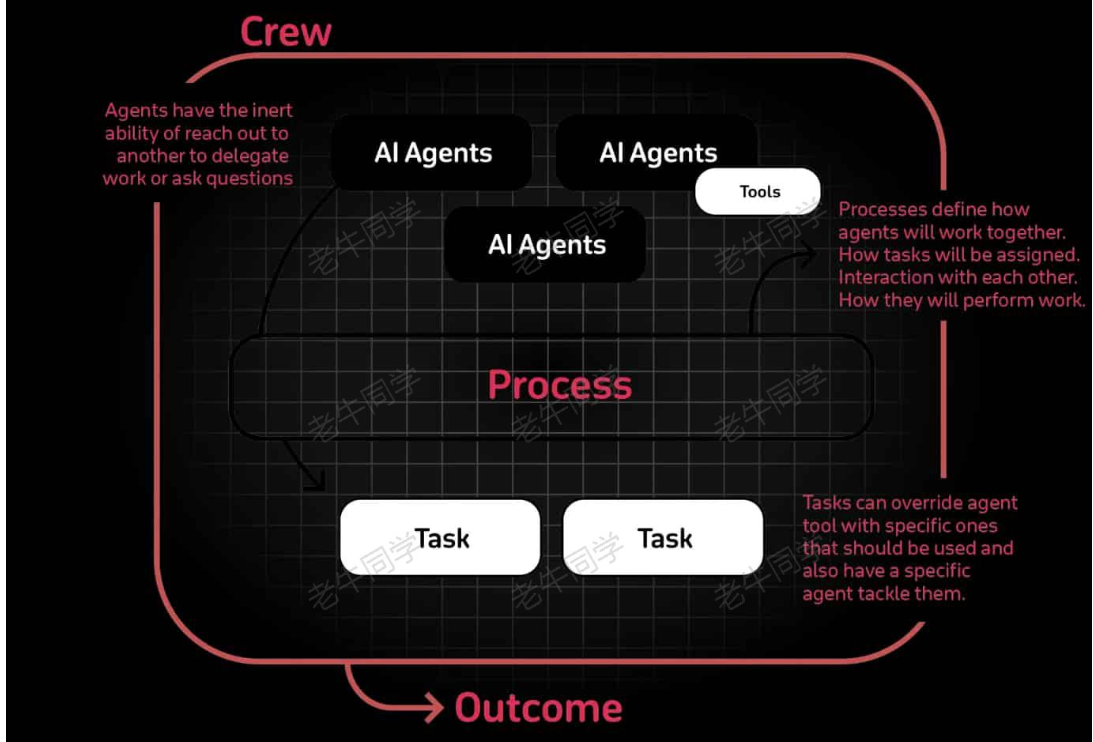

支持OpenAI标准API还有Ollama标准API


CrewAI 框架比较灵活，它不仅支持 OpenAI 标准 API，还支持 Ollama 标准 API，它具备如下核心特征：  
- **角色定制代理**：可以根据不同的角色、目标和工具来量身定制代理。  
- **自动任务委派**：代理之间能够自主地分配任务和进行交流，有效提升解题效率。  
- **任务管理灵活性**：可以根据需要自定义任务和工具，并灵活地指派给不同代理。  
- **流程导向**：目前系统仅支持按顺序执行任务，但更加复杂的如基于共识和层级的流程正在研发中。  

# 本地安装CrewAI框架的依赖

这里不需要做否则后面pip commond not found

In [ ]:
# 安装virtualenv（若未安装）
!pip install virtualenv

# 创建虚拟环境（指定Python 3.10版本）
!virtualenv CrewAI --python=python3.10

# 激活虚拟环境（Colab需通过source命令激活）
%env PATH="/content/CrewAI/bin:$PATH"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 31.2 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 812ms
  creator CPython3Posix(dest=/content/CrewAI, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==25.1.1, setuptools==80.3.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
env: PATH="/content/CrewAI/bin:$PATH"


In [ ]:
# 在虚拟环境中安装crewai
!pip install crewai

/bin/bash: line 1: pip: command not found



#### 使用 CrewAI 搭建自动化写作系统  
前面提到，智能体依赖的大模型既支持 OpenAI 标准接口，也支持 Ollama 标准接口


##### 【第一步：明确我们的需求】  
我们再来想当一次“老板”，还是以儿童绘本故事为例，我们只提供一个主题：由第 1 个智能体根据主题产出绘本故事的构思内容，然后由第 2 个智能体根据第 1 个智能体的构思内容，产出故事内容。  

因此，我们需要有 2 个智能体（即：需要定义 2 个角色），分别是：**故事内容构思者** 和 **故事内容协作者**；他们各自都有一个任务，分别是：**产出故事内容构思** 和 **根据构思编写故事**。  




##### 【第二步：定义构思者角色的智能体】  
对于构思者智能体，它的定义如下：  
- **角色（role）**：设定为“构思者”  
- **目标（goal）**：根据给定的主题（`{topic}`），产出儿童绘本故事内容创意  
- **背景故事（backstory）**：尽可能多地设定相关上下文，如职责、对产出物的要求等  
- **其它属性**：  
  - `allow_delegation`：代表这个智能体不允许把工作委托给其他智能体；  
  - `verbose`：代表把它的工作详细记录下来，以便查看其执行内部任务时的运行过程  


##### 【第三步：定义写作者角色的智能体】  
对于写作者智能体来说，它的目标就是：**根据构思者所提供的儿童绘本故事创意来编写故事内容**。  


##### 【第四步：定义每个智能体的任务】  
上面我们定义了 2 个智能体角色，现在给他们分别定义 1 个任务：  

In [ ]:
# 激活虚拟环境（假设路径为 /content/crewai_env）
%run /content/crewai_env/bin/activate

Exception: File `'/content/crewai_env/bin/activate.py'` not found.

In [ ]:
!pip install crewai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.0/647.0 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.9 MB/s eta

In [ ]:
!pip install crewai openai langchain

In [ ]:
# ✅ 第二步：配置你的 OpenAI API Key
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
# ✅ 第三步：导入相关模块
from crewai import Agent, Task, Crew, Process

In [ ]:
# ✅ 第四步：定义两个智能体角色
planner = Agent(
    role='故事内容构思者',
    goal='根据给定主题 {topic} 产出儿童绘本创意构思',
    backstory='你是一个擅长儿童绘本创意的编辑，善于将传统文化和幻想融合在一起。',
    allow_delegation=False,
    verbose=True
)

writer = Agent(
    role='故事内容协作者',
    goal='根据构思内容编写完整儿童绘本故事',
    backstory='你是一位有温度的儿童故事作家，专注打造寓教于乐的故事。',
    allow_delegation=False,
    verbose=True
)

In [ ]:
# ✅ 第五步：定义两个任务
plan = Task(
    description='''
    1. 故事情节紧凑, 富有想象力, 吸引孩子们阅读。
    2. 插图色彩鲜艳, 画面生动, 有助于培养孩子们的审美观。
    3. 故事融入了传统神话元素, 传承了中华民族的优秀文化。
    4. 通过孙悟空的成长历程, 教育孩子们勇敢、智慧、团结的重要性。
    ''',
    expected_output='故事内容创意分为4个小段，并以Markdown格式输出',
    agent=planner
)

write = Task(
    description='根据"构思者"的绘本故事创意, 补充完整个故事内容编写。',
    expected_output='故事内容分为4个小段，详细展开，每段以Markdown格式输出',
    agent=writer
)



构思者和写作者的任务，均包含了 **描述（description）**、**期望输出（expected_output）** 和 **分配的智能体（agent）** 等 3 个属性：  
- **描述**：期望智能体能做什么；  
- **预期的输出**：类似一种强制机制，明确任务的产出结果；  
- **智能体**：即为这个任务分配智能体。  


In [ ]:
# ✅ 第六步：组合团队并执行
crew = Crew(
    agents=[planner, writer],
    tasks=[plan, write],
    verbose=True,
    process=Process.sequential  # 串行流程
)


In [ ]:
# ✅ 第七步：运行任务
result = crew.kickoff(
    inputs={
        'topic': '西游记·三打白骨精'
    }
)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: f85a34e9-3408-46aa-acac-990ef8cf2673                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# Agent: 故事内容构思者

## Task: 
    1. 故事情节紧凑, 富有想象力, 吸引孩子们阅读。
    2. 插图色彩鲜艳, 画面生动, 有助于培养孩子们的审美观。
    3. 故事融入了传统神话元素, 传承了中华民族的优秀文化。
    4. 通过孙悟空的成长历程, 教育孩子们勇敢、智慧、团结的重要性。
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    # Agent: 故事内容构思者

## Task: 
    1. 故事情节紧凑, 富有想象力, 吸引孩子们阅读。
    2. 插图色彩鲜艳, 画面生动, 有助于培养孩子们的审美观。
    3. 故事融入了传统神话元素, 传承了中华民族的优秀文化。
    4. 通过孙悟空的成长历程, 教育孩子们勇敢、智慧、团结的重要性。
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    # Agent: 故事内容构思者

[00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    

## Task: 
    1. 故事情节紧凑, 富有想象力, 吸引孩子们阅读。
    2. 插图色彩鲜艳, 画面生动, 有助于培养孩子们的审美观。
    3. 故事融入了传统神话元素, 传承了中华民族的优秀文化。
    4. 通过孙悟空的成长历程, 教育孩子们勇敢、智慧、团结的重要性。
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
  

╭───────────────────────────────────────────────── Crew Failure ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Failed                                                                                          │
│  Name: crew                                                                                                     │
│  ID: f85a34e9-3408-46aa-acac-990ef8cf2673                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

RecursionError: maximum recursion depth exceeded

RecursionError: maximum recursion depth exceeded while calling a Python object

你在运行 CrewAI 项目时看到的这一堆奇怪的乱码（比如 `[00m` 和 `Exception in thread Thread-8:`）一般是因为以下几种情况：

---

### ✅ **1. 控制台输出 ANSI 转义码**

这些 `[00m` 是 ANSI 控制字符，通常用于给终端输出加颜色，比如：

```text
[31m 错误信息 [0m
```

意思是“用红色显示错误信息”，但 **Colab 的输出窗口**有时无法正确渲染这些转义字符，就会看到一堆乱码。

> ✅**解决方法**：这些乱码**不影响代码运行结果**，可以忽略。如果你想避免它，可以尝试禁用日志的彩色输出（比如关闭 `rich` 或 `colorlog`）——但通常不值得这么做。

---

### ✅ **2. Thread-8 异常提示**

这个错误提示：

```
Exception in thread Thread-8:
```

意味着在你运行的某段代码中，有一个子线程（比如在后台执行网络请求或模型推理）抛出了异常。

> 你需要查看更多完整错误信息（比如：后面应该还有 `Traceback`，或类似 `AttributeError`、`KeyError` 等字样），这才能判断问题在哪。

---

### 🔍 常见触发此类异常的 CrewAI 场景：

1. **API Key 未设置或无效**
   如果你使用的是 OpenAI 的接口，需要设置有效的环境变量：

   ```python
   import os
   os.environ["OPENAI_API_KEY"] = "sk-xxxxxxx"
   ```

   没设置或者 Key 失效，就会导致异常但可能没有友好提示。

2. **模型响应时间太长或失败**
   比如访问 OpenAI 或 Ollama 太慢、被限流，也会导致后端线程超时挂掉。

3. **任务输出格式与期望不一致**
   如果某个 Agent 没有返回预期格式的输出（比如期望 Markdown、结果却是空），也可能抛异常。

---

### ✅ 建议你现在这么操作：

1. **重新运行代码单元，并贴出完整 Traceback 错误信息给我看**；

2. 如果你用了 OpenAI 的接口，确保你添加了 API Key，例如：

   ```python
   import os
   os.environ["OPENAI_API_KEY"] = "sk-xxxxx"
   ```

3. 如果你是在跑 Ollama 本地模型，请确保它已在本地运行，并且端口可访问。

---

🛠️ **需要我帮你进一步排查**？请复制完整的错误输出，包括 `Traceback` 那一段，我就能准确定位问题。你也可以告诉我你用的是哪种模型（OpenAI 还是 Ollama），我可以为你提供更适配的代码。


In [ ]:
# ✅ 第七步：运行任务
result = crew.kickoff(
    inputs={
        'topic': '西游记·三打白骨精'
    }
)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: f85a34e9-3408-46aa-acac-990ef8cf2673                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# Agent: 故事内容构思者

[00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    

## Task: 
    1. 故事情节紧凑, 富有想象力, 吸引孩子们阅读。
    2. 插图色彩鲜艳, 画面生动, 有助于培养孩子们的审美观。
    3. 故事融入了传统神话元素, 传承了中华民族的优秀文化。
    4. 通过孙悟空的成长历程, 教育孩子们勇敢、智慧、团结的重要性。
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
    [00m
  

╭───────────────────────────────────────────────── Crew Failure ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Failed                                                                                          │
│  Name: crew                                                                                                     │
│  ID: f85a34e9-3408-46aa-acac-990ef8cf2673                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

RecursionError: maximum recursion depth exceeded

RecursionError: maximum recursion depth exceeded

你遇到的这个错误是典型的 **递归调用无限循环导致的栈溢出**（`RecursionError: maximum recursion depth exceeded`），而且它在 CrewAI 的 `on_task_failed` 事件处理函数中触发，属于 **事件处理回调逻辑出错** 的问题。

---

## ✅ 错误解读

从错误堆栈来看：

```
[EventBus Error] Handler 'on_task_failed' failed for event 'TaskFailedEvent': maximum recursion depth exceeded
```

这说明：

* 当某个任务失败（`TaskFailedEvent`）时，
* `on_task_failed` 被触发，
* 但这个函数可能又触发了新的 `TaskFailedEvent`，从而再次调用 `on_task_failed`，
* 如此递归，直到 Python 的最大调用栈被耗尽。

---

## ✅ 根本原因（高概率）

你可能在定义 `on_task_failed` 事件处理器时，做了**如下逻辑错误**：

```python
def on_task_failed(event):
    # 错误逻辑：再次引发失败或打印失败，这导致触发新事件
    raise Exception("Task failed again")  # ❌ 不该这么做
```

或者调用了其他会再次触发事件的动作（如 `crew.execute()` 或任务重试）

---

## ✅ 解决方法

你需要修改你的事件处理器 `on_task_failed`，**确保它不会递归调用自身**。

---

### ✅ 推荐写法示例（防止递归）：

#### ✅ 方法一：只打印一次失败信息，不做递归处理

```python
from crewai import Crew, TaskFailedEvent

def on_task_failed(event: TaskFailedEvent):
    print(f"[❌] Task failed: {event.task.name}")
    print(f"Reason: {event.error}")
    # 不要 raise 或 retry，避免再次触发任务失败事件

crew = Crew(
    agents=[...],
    tasks=[...],
    on_task_failed=on_task_failed,  # ✅ 安全注册事件处理器
)
crew.execute()
```

---

### ✅ 方法二：设置最大重试次数，避免无限循环

```python
def on_task_failed(event: TaskFailedEvent):
    retries = getattr(event.task, "retries", 0)
    if retries < 1:
        print(f"[⚠️] Retrying task {event.task.name}")
        event.task.retries = retries + 1
        event.task.execute()  # 小心：只允许执行一次！
    else:
        print(f"[❌] Task permanently failed: {event.task.name}")
```

---

### ✅ 额外建议

#### 1. **避免在失败回调中调用 `crew.execute()` 或其他会重新触发任务失败的函数**

这很容易引发递归。

#### 2. **设置 Python 的最大递归深度**（可选，仅缓解，不治本）

```python
import sys
sys.setrecursionlimit(2000)
```

但这不建议作为根本解决办法。

---

## ✅ 快速修复思路

请检查你当前 CrewAI 代码中的 `on_task_failed` 处理器，如果你愿意，可以贴出那部分，我可以**直接给你修改好的版本**。

也可以直接按我上面的方式改，用最安全的打印模式来替换你原来的递归处理逻辑。

---

需要我现在帮你修改具体代码？请贴上你那部分 `on_task_failed` 的定义和 Crew 初始化部分，我来直接给你改好。


In [ ]:
# ✅ 输出结果
print("\n\n🎉 最终生成的绘本故事内容：")
print(result)




🎉 最终生成的绘本故事内容：


NameError: name 'result' is not defined


智能体是按照顺序执行任务的，上一个任务的输出，会被作为下一个任务的输入。特别注意：我们提供了 `topic` 上下文参数，它在智能体和任务中可以通过 `{topic}` 使用。  

运行程序，我们可以逐步看到构思者智能体和写作者智能体的运行过程内容，最终产出目标故事内容。  


#### 最后：CrewAI 总结说明  
通过以上示例，我们了解了 CrewAI 的三个核心模块：  
1. **Agent（智能体）**：一般情况下，一个 Agent 只做一件事，明确智能体的目标和期望；当然，一个 Agent 可以执行多项任务。  
2. **Task（任务）**：无论是创建 Agent 还是 Task 都需要明确自己的职责，以及对自己的期望。  
3. **Crew（团队）**：最终把任务，按照串行或并行的方式组织起来。  

# 修改1：原版改成colab上可以运行的

In [ ]:
# CrewAI 自动化写作系统：Google Colab 可运行版本

# ✅ 第一步：安装依赖
!pip install crewai openai langchain

# ✅ 第二步：配置你的 OpenAI API Key
import os
os.environ["OPENAI_API_KEY"] = "sk-你的API密钥"

# ✅ 第三步：导入相关模块
from crewai import Agent, Task, Crew, Process

# ✅ 第四步：定义两个智能体角色
planner = Agent(
    role='故事内容构思者',
    goal='根据给定主题 {topic} 产出儿童绘本创意构思',
    backstory='你是一个擅长儿童绘本创意的编辑，善于将传统文化和幻想融合在一起。',
    allow_delegation=False,
    verbose=True
)

writer = Agent(
    role='故事内容协作者',
    goal='根据构思内容编写完整儿童绘本故事',
    backstory='你是一位有温度的儿童故事作家，专注打造寓教于乐的故事。',
    allow_delegation=False,
    verbose=True
)

# ✅ 第五步：定义两个任务
plan = Task(
    description='''
    1. 故事情节紧凑, 富有想象力, 吸引孩子们阅读。
    2. 插图色彩鲜艳, 画面生动, 有助于培养孩子们的审美观。
    3. 故事融入了传统神话元素, 传承了中华民族的优秀文化。
    4. 通过孙悟空的成长历程, 教育孩子们勇敢、智慧、团结的重要性。
    ''',
    expected_output='故事内容创意分为4个小段，并以Markdown格式输出',
    agent=planner
)

write = Task(
    description='根据"构思者"的绘本故事创意, 补充完整个故事内容编写。',
    expected_output='故事内容分为4个小段，详细展开，每段以Markdown格式输出',
    agent=writer
)

# ✅ 第六步：组合团队并执行
crew = Crew(
    agents=[planner, writer],
    tasks=[plan, write],
    verbose=True,
    process=Process.sequential  # 串行流程
)

# ✅ 第七步：运行任务
result = crew.kickoff(
    inputs={
        'topic': '西游记·三打白骨精'
    }
)

# ✅ 输出结果
print("\n\n🎉 最终生成的绘本故事内容：")
print(result)


In [ ]:
!pip install langchain langchain-openai openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.4/438.4 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.60
    Uninstalling langchain-core-0.3.60:
      Successfully uninstalled langchain-core-0.3.60


如果你使用的是旧版本的 langchain，请确保你使用的是正确的模块名。在较新的版本中，langchain_openai 是分离出来的模块。

In [ ]:
# ✅ Step 1: 安装依赖
!pip install -q crewai langchain langchain-openai

In [ ]:
# ✅ Step 3: 定义 Agents、Task 和 Crew
from crewai import Agent, Task, Crew
from langchain_openai import ChatOpenAI

In [ ]:
# ✅ 第二步：配置你的 OpenAI API Key
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
import os

# Azure OpenAI 配置
os.environ["OPENAI_API_TYPE"] = "azure"  # 指定使用 Azure 服务
os.environ["OPENAI_API_VERSION"] = "2024-12-01-preview"  # API 版本
os.environ["OPENAI_API_BASE"] = ""  # 资源 URL
os.environ["OPENAI_API_KEY"] = "C"  # 从 Azure 门户获取的密钥
os.environ["OPENAI_MODEL_NAME"] = "gpt-4-32k"  # 部署名称（非模型名称）

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "你的_AZURE_API_KEY"
os.environ["OPENAI_API_BASE"] = "https://你的资源名.openai.azure.com/"
os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2023-05-15"
AZURE_DEPLOYMENT_NAME = "你的部署名称"  # 例如 gpt-35-turbo

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""
os.environ["OPENAI_API_BASE"] = "https://gongfan.openai.azure.com/"
os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2024-12-01-preview"
AZURE_DEPLOYMENT_NAME = "gpt-4-32k"  # 例如 gpt-35-turbo

In [ ]:
!pip install openai

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "你的_AZURE_API_KEY"
os.environ["OPENAI_API_BASE"] = "https://你的资源名.openai.azure.com/"
os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2023-05-15"
AZURE_DEPLOYMENT_NAME = "你的部署名称"  # 例如 gpt-35-turbo

In [ ]:
# ✨ 安装依赖
!pip install openai crewai


quirement already satisfied: onnxruntime>=1.14.1 in /usr/local/lib/python3.11/dist-packages (from chromadb>=0.5.23->crewai) (1.22.0)


In [ ]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.4/720.4 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.75.0
    Uninstalling openai-1.75.0:
      Successfully uninstalled openai-1.75.0


In [ ]:
!pip uninstall -y openai

Found existing installation: openai 1.82.0
Uninstalling openai-1.82.0:
  Successfully uninstalled openai-1.82.0


In [ ]:
!pip install "openai>=1.2.0"

  Using cached openai-1.82.0-py3-none-any.whl.metadata (25 kB)
Using cached openai-1.82.0-py3-none-any.whl (720 kB)


In [ ]:
import openai
print("OpenAI SDK 版本:", openai.__version__)

OpenAI SDK 版本: 1.75.0


In [ ]:
!pip install "openai==1.3.1"  # 明确指定兼容版本

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: anyio
    Found existing installation: anyio 4.9.0
    Uninstalling anyio-4.9.0:
      Successfully uninstalled anyio-4.9.0
  Attempting uninstall: openai
    Found existing installation: openai 1.82.0
    Uninstalling openai-1.82.0:
      Successfully uninstalled openai-1.82.0


In [ ]:
import openai
print("OpenAI SDK 版本:", openai.__version__)

OpenAI SDK 版本: 1.3.1


In [ ]:

# ✨ 配置 Azure OpenAI
AZURE_ENDPOINT = "https://gongfan.openai.azure.com/"
AZURE_API_KEY = "xxxxx"
DEPLOYMENT_NAME = "gpt-4-32k"

from openai import AzureOpenAI


azure_llm = AzureOpenAI(
    api_version="2024-12-01-preview",
    azure_endpoint=AZURE_ENDPOINT,
    api_key=AZURE_API_KEY
)

# ✨ 定义 LLM
llm = azure_llm

TypeError: Client.__init__() got an unexpected keyword argument 'proxies'

In [ ]:
# ✅ 第一步：安装依赖
!pip install crewai openai langchain

INFO: pip is looking at multiple versions of crewai to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install crewai==0.121.1 and openai because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested openai
    crewai 0.121.1 depends on openai>=1.13.3

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""
os.environ["OPENAI_API_BASE"] = "https://gongfan.openai.azure.com/"
os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2024-12-01-preview"
AZURE_DEPLOYMENT_NAME = "gpt-4-32k"  # 例如 gpt-35-turbo

In [ ]:
# ✅ 第三步：导入相关模块
from crewai import Agent, Task, Crew, Process
from langchain.chat_models import AzureChatOpenAI

KeyError: 'litellm'

这个 KeyError: 'litellm' 是由于 CrewAI 在底层使用了 litellm 作为 LLM 接口适配层，而 litellm 没有正确配置，或者是版本冲突、依赖未安装所致。

我们将你的代码改得更加稳定，并 显式避免使用 litellm，改为使用 langchain + AzureChatOpenAI 模型直连。这意味着我们不会直接依赖 CrewAI 的 LLM 管理方式，而是手动传入 llm 对象。

In [ ]:
# ✅ 第一步：安装依赖
!pip install --upgrade crewai openai langchain tiktoken


INFO: pip is looking at multiple versions of crewai to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install crewai==0.121.1 and openai because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested openai
    crewai 0.121.1 depends on openai>=1.13.3

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
# ✅ 强制使用兼容版本 + 清华镜像加速
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple \
  openai==1.13.3 \
  crewai==0.121.1 \
  langchain==0.1.13 \
  tiktoken


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
ERROR: Could not find a version that satisfies the requirement openai==1.13.3 (from versions: none)
ERROR: No matching distribution found for openai==1.13.3


In [ ]:
import os
os.environ["LITELLM_MODEL_NAME"] = "gpt-4-32k"
os.environ["OPENAI_API_KEY"] = ""
os.environ["OPENAI_API_BASE"] = "https://gongfan.openai.azure.com/"
os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_VERSION"] = "2024-12-01-preview"
AZURE_DEPLOYMENT_NAME = "gpt-4-32k"  # 例如 gpt-35-turbo

In [ ]:

# ✅ 第三步：导入模块
from crewai import Agent, Task, Crew, Process
from langchain.chat_models import AzureChatOpenAI

# ✅ 第四步：创建 LLM 实例
llm = AzureChatOpenAI(
    deployment_name=AZURE_DEPLOYMENT_NAME,
    openai_api_version="2024-12-01-preview",
    temperature=0.7,
)

KeyError: 'litellm'

In [ ]:



# ✨ 定义 Agent 们
researcher = Agent(
    role="AI Researcher",
    goal="收集人工智能发展趋势的相关信息",
    backstory="你是一个在 AI 研究方面有多年经验的专家，擅长搜索最新研究和技术",
    llm=llm,
    verbose=True
)

writer = Agent(
    role="科技写作专家",
    goal="撰写一篇关于 AI 发展的简洁文章",
    backstory="你是一名技术写作专家，擅长将复杂的概念写成通俗易懂的内容",
    llm=llm,
    verbose=True
)

# ✨ 定义任务
research_task = Task(
    description=(
        "请研究和总结当前人工智能领域的主要发展趋势，特别关注大型语言模型（LLM）、多模态模型、AI 安全性和开源模型。"
    ),
    expected_output="一个关于 AI 当前发展趋势的简明摘要",
    agent=researcher
)

writing_task = Task(
    description=(
        "根据研究者提供的摘要，撰写一篇简洁的技术文章，适合技术博客发布，标题为《2025 年人工智能的 5 大趋势》"
    ),
    expected_output="完整的技术文章，结构清晰，有吸引力的开头和结尾",
    agent=writer
)

# ✨ 定义 Crew
crew = Crew(
    agents=[researcher, writer],
    tasks=[research_task, writing_task],
    verbose=True
)

# ✅ Step 4: 执行任务
result = crew.kickoff()

# ✅ Step 5: 打印结果
print("\n🎉 最终结果:\n")
print(result)


NameError: name 'Agent' is not defined

# 额度用完了，暂时改成开源模型

# GPT2版本的

用 Hugging Face 的 GPT2 模型替换 OpenAI LLM

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
from threading import Thread
import queue

In [ ]:




# 1. 简单包装 HuggingFace 生成文本接口（pipeline）
class HuggingFaceLLM:
    def __init__(self, model_name="gpt2"):
        self.generator = pipeline("text-generation", model=model_name)

    def generate(self, prompt, max_length=100):
        outputs = self.generator(prompt, max_length=max_length, num_return_sequences=1)
        return outputs[0]['generated_text']

# 2. 定义任务执行环境（模拟 Crew + Task 结构）

class Task:
    def __init__(self, prompt):
        self.prompt = prompt
        self.result = None
        self.error = None

    def run(self, llm):
        try:
            self.result = llm.generate(self.prompt)
        except Exception as e:
            self.error = e

class Crew:
    def __init__(self, tasks, llm):
        self.tasks = tasks
        self.llm = llm

    def execute(self):
        for task in self.tasks:
            print(f"开始执行任务，prompt: {task.prompt}")
            task.run(self.llm)
            if task.error:
                print(f"任务失败，错误: {task.error}")
            else:
                print(f"任务完成，结果:\n{task.result}\n")

# 3. 实际使用

if __name__ == "__main__":
    llm = HuggingFaceLLM(model_name="gpt2")  # 也可以换成其他 HF 模型，例如 "distilgpt2"

    tasks = [
        Task(prompt="请研究和总结当前人工智能领域的主要发展趋势，特别关注大型语言模型、AI安全性和开源模型。请你全部用中文回答"),
        Task(prompt="请简要介绍多模态模型的概念和应用。请你全部用中文回答")
    ]

    crew = Crew(tasks, llm)
    crew.execute()


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


开始执行任务，prompt: 请研究和总结当前人工智能领域的主要发展趋势，特别关注大型语言模型、AI安全性和开源模型。请你全部用中文回答


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


任务完成，结果:
请研究和总结当前人工智能领域的主要发展趋势，特别关注大型语言模型、AI安全性和开源模型。请你全部用中文回答研究和总结当前人工智能领域的主要发展趋势，特别关注大型语言模型、AI安全性和开源模型。

他后他工作为结当前人工智能领域的主要发展趋势，特别关注大型语言模型、AI安全性和开源模型。

等万很習的放恶击结当前人工智能领域的主要发展趋势，特

开始执行任务，prompt: 请简要介绍多模态模型的概念和应用。请你全部用中文回答
任务完成，结果:
请简要介绍多模态模型的概念和应用。请你全部用中文回答的手机才的一样也的话,今这么引吧。正在家族直的人们及問問問,但有一样的得到那样,只是这么样的话,让介没有了个問問問問問問問問問問問問問問問問問問。 "You, my Lord, are not of the same level as the other prophets. It would be easier for you to have been taken than to have been sent. You did not have to wait so long. If you had been sent earlier, you would have been a little more humble. This is how it is that the Nephites were so hard on you. You have never thought of anything that would make them happy. You have never thought of a day that would have changed. You have never thought of

